# Probability Distributions

## Summary

- Binomial distribution: discrete number of successes
    - n: number of trials
    - p: prob. of success
    - np.random.binomial(n, p, size) for discrete random variable k successes k ∼ B(n, p)
- Geometric distribution: discrete number of failures before the first success 
    - p: prob. of success
    - np.random.geometric(p, size) for discrete random variable k trials k ∼ G(p)
- Poisson distribution: discrete number of events
    - λ: rate of events per unit of continuous time/space.
    - np.random.poisson(lam = lambda, size) for discrete random variable k events k ∼ P ois(λ)
- Exponential distribution: continuous waiting time until the first event
    - λ: rate of events per unit of continuous time/space. This is the inverse of scale
    - np.random.exponential(scale = 1/lambda) for continuous random variable x units x ∼ Exp(λ)

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

## Binomial Distribution
Throw a die once. The outcome is success if the side is 1, failure otherwise. This type of trial where the outcome is either success or failure with a certain probability is called a Bernoulli trial. The distribution of the number of successes x out of n independent Bernoulli trials (0 ≤ x ≤ n) is the binomial distribution.

InPython, we can use the `np.random.binomial` function for binomial sampling. 

Let’s throw a die 100 times and count the number of successes (e.g. the side of 1).

In [31]:
np.random.binomial(n = 100, p = 1/6, size = 1)

array([19])

Let’s repeat this 10, 100, 1000, and 10000 times to see the distribution of the number of successes.

Text(0.5, 0, '# of successes')

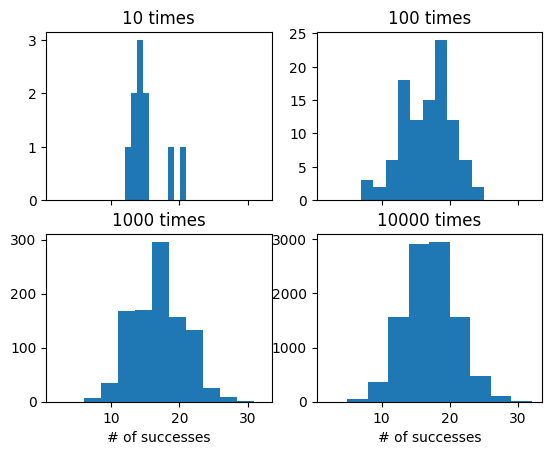

In [32]:
fig, axs = plt.subplots(2,2, sharex = True)
axs[0,0].hist(np.random.binomial(n = 100, p = 1/6, size = 10))
axs[0,0].set_title('10 times')
axs[0,1].hist(np.random.binomial(n = 100, p = 1/6, size = 100))
axs[0,1].set_title('100 times')
axs[1,0].hist(np.random.binomial(n = 100, p = 1/6, size = 1000))
axs[1,0].set_title('1000 times')
axs[1,0].set_xlabel('# of successes')
axs[1,1].hist(np.random.binomial(n = 100, p = 1/6, size = 10000))
axs[1,1].set_title('10000 times')
axs[1,1].set_xlabel('# of successes')

## Geometric distribution

Let’s keep throwing a die until the side is 1. How many times does it take? 

Naively, we can loop binomial sampling until it succeeds.

In [33]:
def get_nrounds(prob):
    c = 0
    n = 0
    while n == 0:
        c += 1
        n = np.random.binomial(n = 1, p = prob, size = 1)
    return c

get_nrounds(1/6)

2

Let’s visualise how this waiting time is distributed

Text(0, 0.5, 'Frequency')

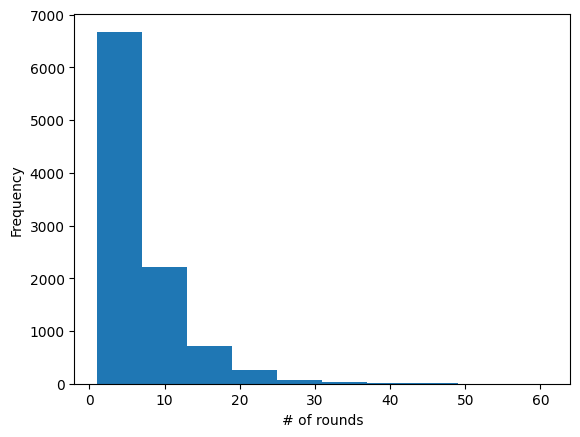

In [34]:
nrounds = [get_nrounds(1/6) for i in range(10000)]
plt.hist(nrounds)
plt.xlabel('# of rounds')
plt.ylabel('Frequency')

The number of failures before the first success is known to follow a **geometric distribution**. So, instead of looping binomial/Bernoulli trials, we can directly obtain the number of throws from a geometric distribution using `np.random.geometric` function.

Text(0, 0.5, 'Frequency')

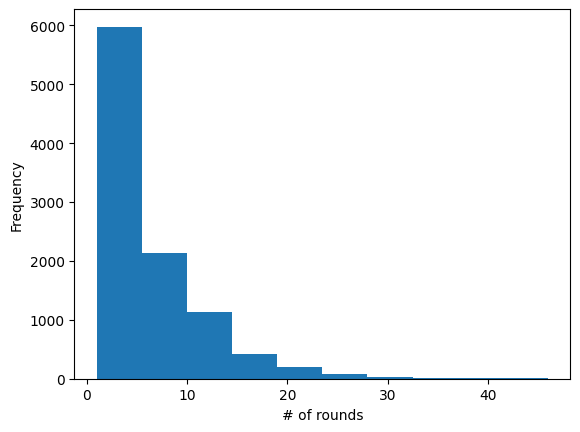

In [35]:
plt.hist(np.random.geometric(p = 1/6, size = 10000))
plt.xlabel('# of rounds')
plt.ylabel('Frequency')

Using a geometric sampling instead of looping is more efficient especially when the probability of success is very low. Let’s measure the time it takes to obtain the number of throws until the first success 100 times using the loop.

In [36]:
%%time
nrounds = [get_nrounds(1/6) for i in range(10000)]

CPU times: user 76.9 ms, sys: 0 ns, total: 76.9 ms
Wall time: 75.2 ms


In [37]:
%%time
nrounds = np.random.geometric(p = 1/6, size = 10000)

CPU times: user 3.67 ms, sys: 0 ns, total: 3.67 ms
Wall time: 2.32 ms


This is a good example that you can still implement your simulation without knowing probability distributions, yet knowing distributions makes your simulation faster and more efficient!

## Poisson distribution

Consider taking 1 mL from a cell suspension at 5,000,000 cells/L (5,000 cell/mL on average). Instead of 1 time of pipetting of 1 mL, let’s pipette n times, 1/n mL each. When n is very large, the probability that multiple cells are in the taken 1/n mL is so low that it contains either one cell at a probability of 5000/n or no cells at a probability of 1 − 5000/n. By considering of having one cell as success, the total number of cells in the n portions (thus 1 mL) should follow the binomial distribution B(n, p), where p = 5000/n. When n → ∞, the binomial distribution approaches a Poisson distribution. The Poisson distribution has one parameter, the rate λ, which depicts the number of events per unit of time or space (in this case, volume). In this example, the number of cells in a sampled suspension of 1 mL should follow a Poisson distribution with λ = 5000.

Let’s take a 1 mL of cell suspension from 5,000 cells/mL.

In [21]:
np.random.poisson(lam = 5000, size = 1)

array([4897])

A nice thing about Poisson distribution is that you can define the unit of time/space as you like as long as the rate parameter is linearly scaled. In the example above, if we take 10 mL instead of 1 mL, the number of sampled cells should now follow another Poisson distribution with λ = 5000 × 10 = 50, 000.

Let’s think of the number of mutations (mutation rate of 1 × 10−9 per year per bp) between two homologous sequences of DNA of 1,000,000 bp, where TMRCA is 500,000 years ago. The total branch length between the two sequences is 100,000 years, and mutation occurs at a rate of 1,000,000 $years$ × 1,000,000 $bp$ × 10−9 $year^{−1}bp^{−1}$ = 1, 000. So the number of mutations follows a Poisson distribution with λ = 1, 000.

In [22]:
np.random.poisson(lam = 1000, size = 1)

array([1020])

We could think of the same problem with binomial sampling, where mutation can occur at a very low probability (10−9 per year per bp) with many trials (1,000,000 [bp] × 1,000,000 [years] = 1,000,000,000,000 trials) We can see how close both ways are:

/tmp/ipykernel_73955/707762543.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.random.poisson(lam = 1000, size = 100000))


Text(0.5, 0, '# of mutations')

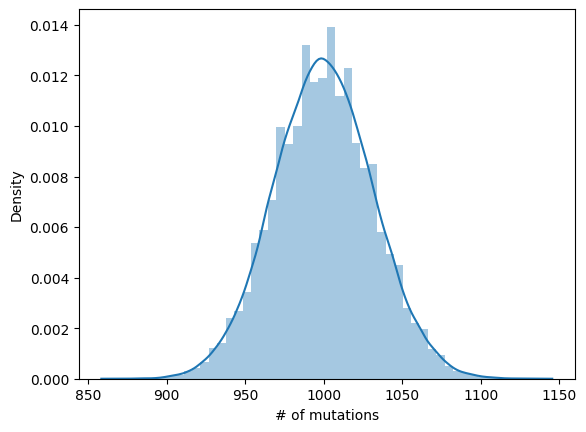

In [39]:
sns.distplot(np.random.poisson(lam = 1000, size = 100000))
plt.xlabel('# of mutations')

## Exponential distribution

Continuing on the example of taking cells, let’s keep sucking the solution until we get the first cell. The random amount of suspension to take until we get the first cell follows a continuous distribution called an exponential distribution, which is the limit of geometric distribution where λ = np and n → ∞. As is the Poisson distribution, the exponential distribution has one parameter, the rate λ.

Let’s sample the amount of suspension at 5,000 cells/mL until you get the first cell. Confusingly, lambda in `np.random.geometric()` is the same rate parameter as rate in `np.random.exponetial()`.

In [40]:
np.random.exponential(scale = 1/5000, size = 1)

array([3.74676073e-05])

According to Wikipedia, the lifetime probability of a fatal lightning strike is 1/60000. So the time it takes for you to die of a lightning hit can be modelled with an exponential distribution. Let’s sample one such event.

In [41]:
print(np.random.exponential(scale = 60000, size = 1)[0] * 70, 'years')

4015373.712978524 years


## Other distributions used in the course

### Hypergeometric distribution

The hypergeometric distribution describes the probability of k successes (random draws for which the object drawn has a specified feature) in n draws, without replacement, from a finite population of size N that contains exactly K objects with that feature, wherein each draw is either a success or a failure. This is similar to binomial distribution, but it is sampling without replacement.

The hypergeometric distribution is often seen in enrichment analysis. For example, in the context of gene ontology analysis, N is the number of all genes, K is the number of all genes of a focal gene ontology term, n is the number of significant genes, k is the number of significant genes of a focal gene ontology.

Let’s sample a number of genes out of 100 significant genes that are of one GO term, when there are 2000 genes of this GO term in 10000 genes throughout the genome.

In [42]:
np.random.hypergeometric(ngood = 2000, # number of genes of a GO type in the genome
                         nbad = 10000 - 2000, # number of genes that are not the GO type in the genome 
                         nsample = 100, # number of significant genes
                         size = 1)


array([21])

Let’s compute the p-value of observing 50 out of 100 significant genes that are of this GO term. _Note that because we calulate the probability numerically here, very small values will just be zero, though the actual probability might not be_ 

In [47]:
1 -stats.hypergeom.cdf(M = 10000, n = 2000, N = 100, k = 50)

3.839373263758716e-12

### Normal distribution

According to the central limit theorem, the average of many observations of some random variable is a random variable, whose distribution converges to a normal distribution as the number of samples increases. Quantities that are expected to be the sum of many independent processes, such as quantitative genetic traits and errors, can be modelled to follow a normal distribution.

Let’s sample a normal random variable with mean of 175 and variance of standard deviation of 6.

In [61]:
np.random.normal(loc = 175, scale = 6, size = 1)

array([168.16575091])